In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

# 假设数据存储在一个 CSV 文件中
df = pd.read_csv(r"C:\Users\z\Desktop\数据挖掘\ETTh1油温预测\ETTh1.csv")
df.head(5)

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


In [7]:
# 转换日期列为 datetime 格式
df['date'] = pd.to_datetime(df['date'])

# 设置日期为索引
df.set_index('date', inplace=True)
df

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
date,,,,,,,
2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
...,...,...,...,...,...,...,...
2018-06-26 15:00:00,-1.674,3.550,-5.615,2.132,3.472,1.523,10.904000
2018-06-26 16:00:00,-5.492,4.287,-9.132,2.274,3.533,1.675,11.044000
2018-06-26 17:00:00,2.813,3.818,-0.817,2.097,3.716,1.523,10.271000


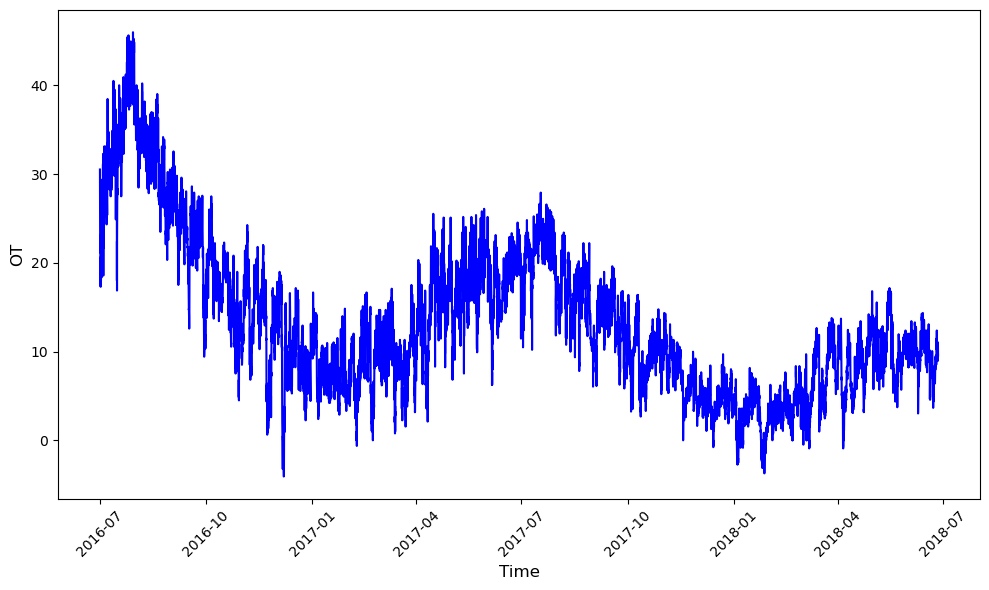

In [8]:
# 绘制 OT 列随时间变化的图
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['OT'], label='OT', color='blue')
plt.xlabel('Time', fontsize=12)
plt.ylabel('OT', fontsize=12)
plt.xticks(rotation=45)
#plt.legend('OT',loc='upper right',fontsize=20)
plt.tight_layout()
# 保存 OT 图
plt.savefig("OT_时间变化图.png",dpi=600)

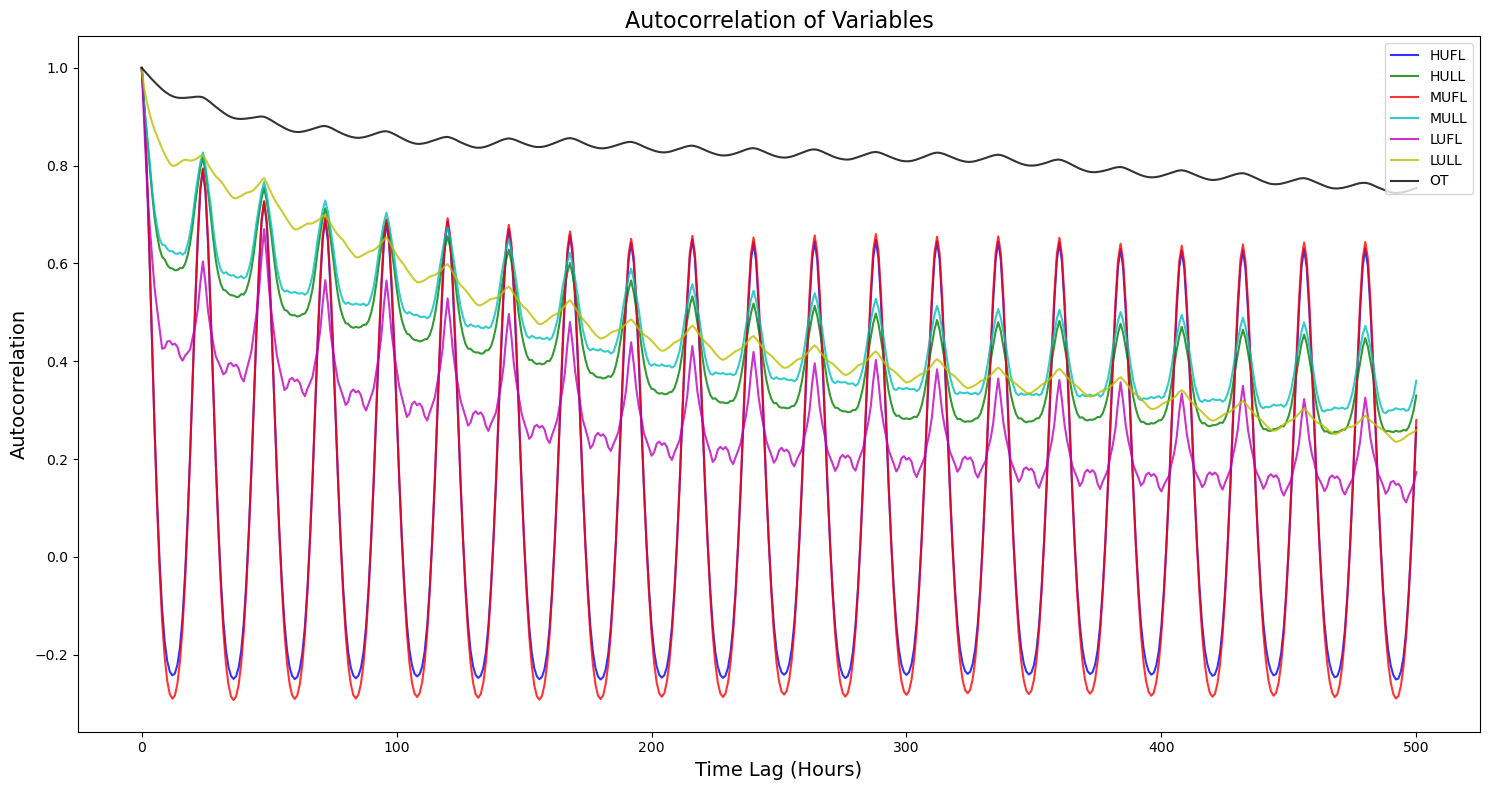

In [9]:
# 设置颜色列表
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

# 创建一个更紧凑的子图布局
plt.figure(figsize=(15, 8))

# 在一个图中绘制所有变量的自回归
for i, col in enumerate(df.columns):
    acf_values = acf(df[col], nlags=500, fft=True)
    plt.plot(acf_values, label=col, color=colors[i % len(colors)], alpha=0.8)

# 设置标题和图例
plt.title('Autocorrelation of Variables', fontsize=16)
plt.xlabel('Time Lag (Hours)', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14)
plt.legend(loc='upper right', fontsize=10)

# 调整布局并保存图片
plt.tight_layout()
plt.savefig("各变量自回归图_无竖线.png", dpi=600)
plt.show()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)             │ (None, 24, 64)              │           4,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 24, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,865 (50.25 KB)

 Trainable params: 12,865 (50.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2051 - val_loss: 0.0281
Epoch 2/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0494 - val_loss: 0.0243
Epoch 3/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0374 - val_loss: 0.0327
Epoch 4/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0334 - val_loss: 0.0399
Epoch 5/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0316 - val_loss: 0.0231
Epoch 6/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0302 - val_loss: 0.0272
Epoch 7/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0290 - val_loss: 0.0451
Epoch 8/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0273 - val_loss: 0.0171
Epoch 9/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0263 - val_loss: 0.0296
Epoch 10/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0226 - val_loss: 0.0203
Epoch 11/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0218 - val_loss: 0.0310
Epoch 12/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

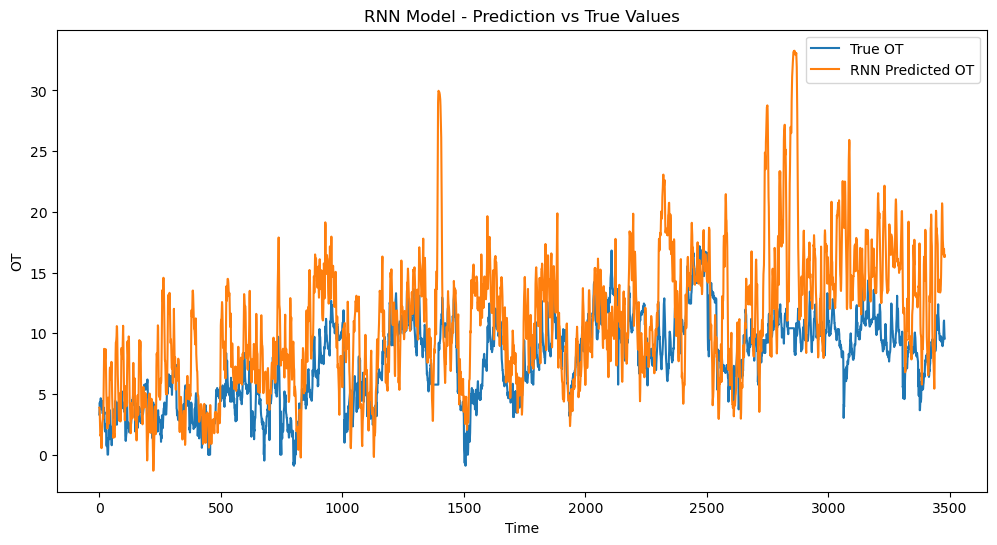

Mean Squared Error (MSE): 30.444522557287144
Root Mean Squared Error (RMSE): 5.517655530865183
Mean Absolute Error (MAE): 4.0894948100478485


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 假设 scaler_y 已经定义，确保你在代码中有合适的归一化部分
# scaler_y = ...

# 定义 RNN 模型
def create_optimized_rnn_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(SimpleRNN(units=64, activation='tanh', return_sequences=True))
    model.add(Dropout(0.3))  # 添加 Dropout 层防止过拟合
    model.add(SimpleRNN(units=64, activation='tanh'))  # 第二个 RNN 层
    model.add(Dropout(0.3))  # 添加 Dropout 层
    model.add(Dense(1))  # 输出预测值
    model.compile(optimizer='adam', loss='mse')
    return model

# 创建 RNN 模型
optimized_rnn_model = create_optimized_rnn_model(input_shape=(X_train.shape[1], X_train.shape[2]))
optimized_rnn_model.summary()

# 早停机制
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 训练 RNN 模型
optimized_rnn_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 使用模型进行预测
y_pred_optimized_rnn = optimized_rnn_model.predict(X_test)

# 反归一化预测值
y_pred_optimized_rnn_rescaled = scaler_y.inverse_transform(y_pred_optimized_rnn)

# 反归一化真实值
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# 打印预测的形状
print(f'Predicted shape: {y_pred_optimized_rnn_rescaled.shape}')
print(f'Real shape: {y_test_rescaled.shape}')

# 绘制并保存 RNN 预测结果
plt.figure(figsize=(12, 6))

# 绘制真实值
plt.plot(y_test_rescaled, label='True OT')

# 绘制优化后的 RNN 预测值
plt.plot(y_pred_optimized_rnn_rescaled, label='RNN Predicted OT')

plt.legend()
plt.title('RNN Model - Prediction vs True Values')
plt.xlabel('Time')
plt.ylabel('OT')

# 保存图像
plt.savefig('RNN预测结果', dpi=600)
plt.show()

# 计算均方误差 MSE 和均方根误差 RMSE
mse = mean_squared_error(y_test_rescaled, y_pred_optimized_rnn_rescaled)
rmse = np.sqrt(mse)

# 计算平均绝对误差 MAE
mae = mean_absolute_error(y_test_rescaled, y_pred_optimized_rnn_rescaled)

# 打印评估指标
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
